# Artificial Neural Network
# Nama : Muhammad Rizki Fauzaan
# Nim : 09011381722096

Heart Disease (Penyakit Jantung) adalah penyakit yang terjadi akibat penyempitan atau penyumbatan pembuluh darah yang dapat menyebabkan serangan jantung, nyeri dada, atau stroke. Pada tugas ini, saya akan menganalisa akurasi data tentang Heart Disease dengan menggunakan Artificial Neural Network.

### 1. Import Library
1. numpy = Digunakan Untuk Menginput Array
2. sklearn.preprocessing = Digunakan Untuk Pemprosessan Data Pada GPU Atau CPU (Training, Test, Asli)
3. matplotlib.pyplot = Digunakan Untuk Membuat Grafik Dataset Yang Telah Valid
4. sklearn.Model_Selection = Digunakan Untuk Memilah Dataset Menjadi Data Training, Data Testing Dan Data Aslinya
5. keras.optimizers = Digunakan Untuk Mengoptimalkan Data Dengan Fungsi Adam
6. keras.Model = Digunakan Untuk Memasukkan Hidden Layers (Banyaknya Jalan Pada 1 Data Ke Data Yang Lain) Dengan Sequential
7. keras.Layers = Digunakan Untuk Banyaknya Hidden Layers Yang Digunakan Untuk 1 Data Set (Banyaknya Cara/Jalan)
8. keras.activations = Digunakan Untuk Mengubah Setiap Nilai Input Negatif Menjadi 0 Pada Grafik Sesegera 
9. keras.Utils = Digunakan Untuk Mengimport Categorical Y
10. pandas = Fungsinya Seperti Numpy, Namun Lebih Kearah Matriks Dengan Baris Dan Kolom Yang Telah Dimuat Dalam Bentuk Tabel
11. seaborn = Digunakan Untuk Visualisasi Data Secara Statistik

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
from keras.utils import np_utils
import pandas as pd
import seaborn as sns

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtyp

### 2. Import Dataset
Dataset yang digunakan adalah dataset yang dikumpulkan oleh Cleveland Clinic Foundation di Switzerlandia. Dataset ini memiliki 303 baris, terdiri dari 13 kolom gejala penyakit dan 1 output target yang menandakan apakah pasien tersebut terkena penyakit jantung atau tidak.

Dataset ini terdiri dari:
1. age (umur)
2. sex (jenis kelamin)
3. cp (sakit dada)
4. trestbps (tekanan darah)
5. chol (kolesterol)
6. fbs (gula darah)
7. restecg (elektrokardiografi)
8. thalach (denyut jantung maximal)
9. exang (olahraga)
10. oldpeak (olahraga saat depresi)
11. slope (olahraga berat)
12. ca (pembuluh darah)
13. thal (diagnosis awal)
14. target (diagnosis akhir)

In [2]:
data = np.loadtxt('heart_disease.csv',delimiter=',', dtype=float)
data

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

In [3]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Lalu periksa data set tersebut dengan perintah "df.info()" untuk mengetahui jenis dataset dimulai dari age hingga target.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


Setelah diperkiksa, dataset tersebut tidak memiliki data yang error (non-null)

Lalu, periksa target (label) agar dapat mengetahui seberapa banyak pasien yang terkena penyakit jantung dan tidak terkena penyakit jantung dengan perintah "df.target.value_counts()".
1. Angka (1) merupakan pasien yang terkena penyakit jantung
2. Angka (0) merupakan pasien yang tidak terkena penyakit jantung

In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

### 3. Set Data dan Target
Pembagian data:
1. Feature - Data untuk feature diambil dari kolom age sampai thal
2. Labels - Data diambil dari kolom Target

In [6]:
features = data[:, 0:13]
labels = data[:, 13]

### 4. Scaling
Scaling digunakan agar data tidak memiliki standat deviasi yang tinggi, dan data akan diukur ulang dimana nilainya paling kecil (min) 0 dan paling besar (max) 1.

In [7]:
sc = MinMaxScaler()
features = sc.fit_transform(features)

### 5. Inisialisasi Data
1. training_data = Inisialisasi Data Features Untuk Menjadi Data Training
2. testing_data = Inisialisasi Data Features Untuk Menjadi Data Testing
3. training_label = Inisialisasi Data Labels Untuk Menjadi Data Training
4. testing_label = Inisialisasi Data Labels Untuk Menjadi Data Testing
5. train_test_split () = Digunakan Untuk Memilah Data. Data Tersebut Akan Terbagi Menjadi Data Training Dan Data Testing Dari Data Features Dan Labels. Data yang dibagi sebesar 80:20, dimana 80% untuk training sedangkan 20% untuk testing.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, stratify=labels)

### 6. Modelling
Model yang digunakan untuk membuat hidden layer dan memproses data adalah dengan menggunakan fungsi Sequential, sedangkan layer sendiri menggunakan tipe Dense yang melakukan teraining dengan menghubungkan setiap neural network secara sequential.
1. Input Layer memiliki 50 layer dengan input dimension sesuai dengan data x_train dan menggunakan aktivasi relu.
2. Hidden Layer memiliki 50 layer dan menggunakan aktivasi relu
3. Droput digunakan untuk mensimulasikan sejumlah besar arsitektur jaringan yang berbeda dengan menurunkan node secara acak selama data di training sebesar 50%
4. Output Layer memiliki 1 layer dan menggunakan fungsi sigmoid
Lalu untuk optimizer disini menggunakan fungsi adam, binary_crossentropy, dan metrics untuk menampilkan accuracy

In [9]:
model = Sequential()
model.add(Dense(units= 50, input_dim = x_train.shape[1], activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Fit Model digunakan untuk mendapatkan hasil akurasi dan loss dari dataset, langkah selanjutnya yang harus dilakukan adalah fit model. Dimana pada proses ini terjadi proses training dengan parameter:
1. x_train dan y_train
2. validasi data dari x_test dan y_test
3. Banyaknya Epochs atau proses training dan Batch Size yang merupakan ukuran data untuk ditraining

In [10]:
proses_train=model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=30, epochs=150)
proses_test=model.evaluate(x_test, y_test)

Instructions for updating:
Use tf.cast instead.
Train on 242 samples, validate on 61 samples
Epoch 1/150
242/242 [==============================] - 1s 2ms/step - loss: 0.6968 - acc: 0.5289 - val_loss: 0.6744 - val_acc: 0.6721
Epoch 2/150
242/242 [==============================] - 0s 91us/step - loss: 0.6593 - acc: 0.5992 - val_loss: 0.6467 - val_acc: 0.7377
Epoch 3/150
242/242 [==============================] - 0s 99us/step - loss: 0.6422 - acc: 0.6818 - val_loss: 0.6202 - val_acc: 0.7869
Epoch 4/150
242/242 [==============================] - 0s 182us/step - loss: 0.6293 - acc: 0.6818 - val_loss: 0.5988 - val_acc: 0.8361
Epoch 5/150
242/242 [==============================] - 0s 140us/step - loss: 0.6067 - acc: 0.6860 - val_loss: 0.5743 - val_acc: 0.8197
Epoch 6/150
242/242 [==============================] - 0s 211us/step - loss: 0.5799 - acc: 0.7479 - val_loss: 0.5489 - val_acc: 0.8361
Epoch 7/150
242/242 [==============================] - 0s 178us/step - loss: 0.5655 - acc: 0.7645 - v

242/242 [==============================] - 0s 173us/step - loss: 0.2848 - acc: 0.8926 - val_loss: 0.3228 - val_acc: 0.9016
Epoch 120/150
242/242 [==============================] - 0s 165us/step - loss: 0.2928 - acc: 0.9008 - val_loss: 0.3237 - val_acc: 0.9016
Epoch 121/150
242/242 [==============================] - 0s 165us/step - loss: 0.2907 - acc: 0.8802 - val_loss: 0.3213 - val_acc: 0.9180
Epoch 122/150
242/242 [==============================] - 0s 136us/step - loss: 0.2693 - acc: 0.9174 - val_loss: 0.3225 - val_acc: 0.9016
Epoch 123/150
242/242 [==============================] - 0s 165us/step - loss: 0.2816 - acc: 0.8843 - val_loss: 0.3203 - val_acc: 0.9016
Epoch 124/150
242/242 [==============================] - 0s 136us/step - loss: 0.2829 - acc: 0.8843 - val_loss: 0.3208 - val_acc: 0.9016
Epoch 125/150
242/242 [==============================] - 0s 145us/step - loss: 0.2595 - acc: 0.8843 - val_loss: 0.3252 - val_acc: 0.9016
Epoch 126/150
242/242 [==============================] 

Setelah data di training, lalu data dapat dievaluasi melalui proses evaluasi model dan hasil dari akurasi akan dapat ditampilkan.

In [11]:
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

61/61 [==============================] - 0s 98us/step

acc: 90.16%


Akurasi yang didapat setelah data ditraining adalah sebesar 90.16%

### 7. Visualisasi
Data yang telah ditraining melalui epochs dapat ditampilkan dalam bentuk grafik (plot model). Grafik yang ditampilkan ada dua buah grafik. Grafik pertama menampilkan Akurasi dan grafik kedua menampilkan Loss.

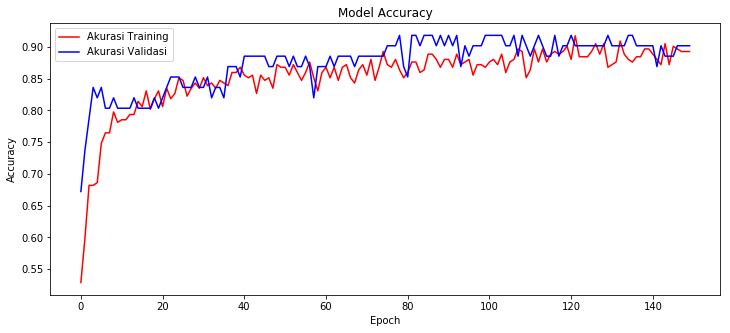

In [12]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(proses_train.history['acc'],'red', label='Akurasi Training')
ax0.plot(proses_train.history['val_acc'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

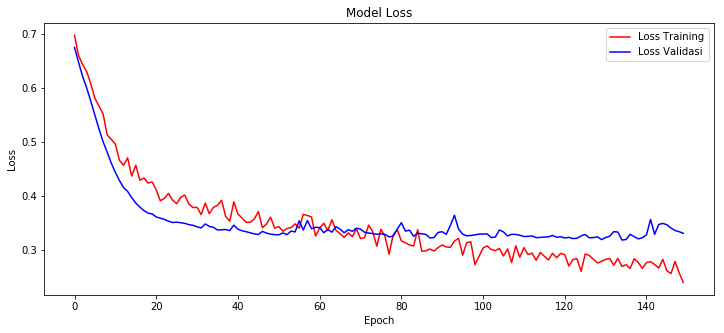

In [13]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(proses_train.history['loss'],'red', label='Loss Training')
ax1.plot(proses_train.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

### 8. Confusion Matrix
Confusion Matrix digunakan untuk dapat mengkalkulasi nilai dari data yang masih dalam bentuk Array dan dikonversikan ke bentuk tipe data integer ataupun float.

Untuk dapat menghitung Confusion Matrix pada dataset yang telah diolah, kita deklarasikan model predict dari data training dan data testing

In [14]:
training_predicted = model.predict(x_train)
testing_predicted = model.predict(x_test)

Lalu masukkan deklarasi sklean.metrics yang berfungsi sebagai penghitung Confusion Matrix dan deklarasikan lagi data training dan data testing dalam bentuk Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(y_train,training_predicted.round())
testing_cm = confusion_matrix(y_test,testing_predicted.round())

Nilai Confussion Matrix terdiri dari True Positive (TP), False Negative (FN), False Positive (FP), dan True Negative (TN).

|Confusion Matrix|
|----|--|
|TP|FN|
|FP|TN|

Setiap Confusion Matrix dapat menghitung Accuracy, Specificity, Sensitivity, Precision, dan F1 Score dari data training dan testing dengan menggunakan rumus berikut

$$Accuracy = \frac {tp+tn}{tp+tn+fp+fn}$$

$$Specificity = \frac {tn}{tn+fp}$$

$$Sensitivity = \frac {tp}{tp+fn}$$

$$Precision = \frac {tp}{tp+fp}$$

$$F1 Score = \frac {2 \times Sensitivity \times Precision}{Sensitivity+ Precision}$$

Berikut hasil Confusion Matrix dari data training

|Confusion Matrix|
|----|--|
|TP|FN|
|FP|TN|

In [16]:
training_cm

array([[ 95,  15],
       [  8, 124]], dtype=int64)

Lalu hitung setiap Nilai Confusion Matrix dengan menggunakan rumus Accuracy, Specificity, Sensitivity, Precision, dan F1 Score

In [17]:
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.9049586776859504
Specificity training 0.9393939393939394
Sensitivity training 0.8636363636363636
Precision training 0.9223300970873787
F1 Score training 0.892018779342723


Diatas adalah hasil dari kalkulasi Confusion Matrix untuk data training

Berikut hasil Confusion Matrix dari data testing

|Confusion Matrix|
|----|--|
|TP|FN|
|FP|TN|

In [18]:
print(testing_cm)

[[25  3]
 [ 3 30]]


Lalu hitung setiap Nilai Confusion Matrix dengan menggunakan rumus Accuracy, Specificity, Sensitivity, Precision, dan F1 Score

In [19]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.9016393442622951
Specificity testing 0.9090909090909091
Sensitivity testing 0.8928571428571429
Precision testing 0.8928571428571429
F1 Score testing 0.8928571428571429


Diatas adalah hasil dari kalkulasi Confusion Matrix untuk data testing

### 9. Kesimpulan
Dataset Heart Diseases yang memiliki 303 baris data dari UCI yang menggunakan metode ANN memiliki akurasi data training sebesar 90,4% dan akurasi data testing sebesar 90,16%.

### 10. Referensi
1. Paper [Heart Diseases Diagnoses Using Artificial Neural Network](https://pdfs.semanticscholar.org/1491/d8b6e26864f217fa3e099645de0dd6bf7d81.pdf)
2. Dataset [Heart Diseases](https://www.kaggle.com/ronitf/heart-disease-uci)